In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intermediate goal: approximate $\sigma(x_0, E)$ for all $x_0 \in E$.

(-5.0, 5.0)

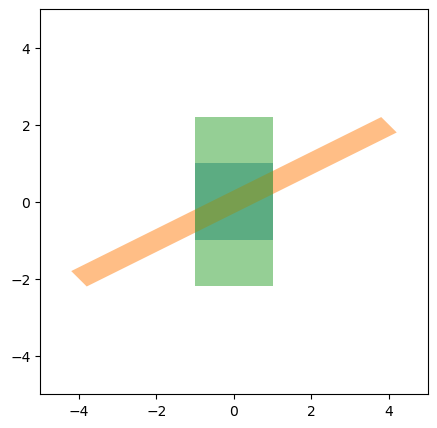

In [2]:
# Parallelogram: a matrix that represents the image of [-1,1]x[-1,1]x[-1,1]
# para[n] rpresents the midpoint of the n-th edge

def _parallelogram_addition(para1, para2):
    matrix = np.linalg.inv(para1)

    vertex0 = (para2[0] + para2[1]) @ matrix
    vertex1 = (para2[0] - para2[1]) @ matrix

    m0 = np.max(np.abs([vertex0[0], vertex1[0]])) + 1
    m1 = np.max(np.abs([vertex0[1], vertex1[1]])) + 1

    new_para = np.diag([m0, m1]) @ para1

    return new_para

def parallelogram_addition(para1, para2):
    new_para1 = _parallelogram_addition(para1, para2)
    new_para2 = _parallelogram_addition(para2, para1)

    if parallelogram_area(new_para1) <= parallelogram_area(new_para2):
        return new_para1
    else:
        return new_para2

def _parallelogram_intersection(para1, para2):
    matrix = np.linalg.inv(para1)

    midpoint0 = para2[0] @ matrix
    midpoint1 = para2[1] @ matrix

    m0 = 0
    m1 = 0

    if np.abs(midpoint1[1]) + np.abs(midpoint0[1]) > 1:
        if np.linalg.det([np.array([1,1]) - midpoint1, midpoint0]) > 0:
            print("This")
            m0 = np.max([m0, np.sign(midpoint1[1]) * midpoint1[0] + (1 - midpoint1[1]) / midpoint0[1] * midpoint0[0]])
            m1 = 1
        else:
            m0 = 1
            m1 = np.max([m1, np.sign(midpoint1[1]) * midpoint1[0] + (1 - midpoint1[1]) / midpoint0[1] * midpoint0[0]])
    else:
        print("That")
        m0 = np.max([m0, np.sign(midpoint1[1]) * midpoint1[0] + midpoint0[0] * np.sign(midpoint0[1])])
        m1 = np.max([m1, np.sign(midpoint1[1]) * midpoint1[1] + midpoint0[1] * np.sign(midpoint0[1])])
        # print(np.sign(midpoint1[1]) * midpoint1[1] + midpoint0[1] * np.sign(midpoint0[1]))

    new_para = np.diag([m0, m1]) @ para1

    return new_para

def parallelogram_intersection(para1, para2):
    new_para1 = _parallelogram_intersection(para1, para2)
    new_para2 = _parallelogram_intersection(para2, para1)

    if parallelogram_area(new_para1) <= parallelogram_area(new_para2):
        return new_para1
    else:
        return new_para2

def parallelogram_area(para):
    return 4*np.linalg.det(para)

def parallelogram_vertices(para):
    return np.array([
        para[0] + para[1],
        -para[0] + para[1],
        -para[0] - para[1],
        para[0] - para[1]
    ])

def plot_parallelogram(ax: plt.Axes, para):
    vertices = parallelogram_vertices(para)
    ax.fill(vertices[:,0], vertices[:,1], alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

para1 = np.array([[1, 0], [0, 1]])
para2 = np.array([[4, 2], [0.2, -0.2]])

plot_parallelogram(ax, para1)
plot_parallelogram(ax, para2)
plot_parallelogram(ax, _parallelogram_intersection(para1, para2))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

[[-0.66666667  1.66666667]
 [ 0.66666667  1.66666667]]


(-5.0, 5.0)

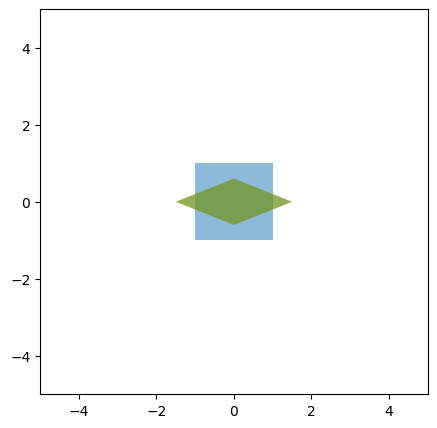

In [15]:
def dual_representation(para):
    side0 = np.array([para[0,1], -para[0,0]])
    side1 = np.array([para[1,1], -para[1,0]])

    return np.array([
        side0/(side0 @ para[1]),
        side1/(side1 @ para[0])
    ])

def _dual_parallelogram_intersection(para1, para2):
    sides = np.array([para1[0], para1[1], para2[0], para2[1]])

    smallest_para = None
    smallest_area = np.inf
    for i in range(4):
        for j in range(i+1, 4):
            area = np.abs(np.linalg.det(dual_representation(np.array([sides[i], sides[j]]))))
            if area < smallest_area:
                smallest_para = np.array([sides[i], sides[j]])
                smallest_area = area

    return smallest_para

def plot_parallelogram(ax: plt.Axes, para):
    vertices = parallelogram_vertices(para)
    ax.fill(vertices[:,0], vertices[:,1], alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

para1 = np.array([[1, 0], [0, 1]])
para2 = np.array([[0.75, 0.3], [-0.75, 0.3]])

plot_parallelogram(ax, para1)
plot_parallelogram(ax, para2)
plot_parallelogram(ax, dual_representation(_dual_parallelogram_intersection(dual_representation(para1), dual_representation(para2))))

print(_dual_parallelogram_intersection(dual_representation(para1), dual_representation(para2)))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

In [29]:
def sigma_0():
    return np.array([[1, 0], [0, 1]])

C = 1

def ball(delta):
    return np.array([[delta, 0], [0, delta]])

E = np.array([
    [0.2, 0.2],
    [0.4, 0.4],
    [0.6, 0.6],
    [0.8, 0.8],
])

sigma = np.array([sigma_0(), sigma_0(), sigma_0(), sigma_0()])

def recrusive(sigma):
    new_sigma = sigma
    for i in range(len(E)):
        x = E[i]
        for j in range(len(E)):
            y = E[j]
            new_sigma[i] = parallelogram_intersection(new_sigma[i], sigma[j] + C * ball(np.linalg.norm(x-y, ord=np.inf)))

    return new_sigma

sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)
sigma = recrusive(sigma)

sigma

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])